In [1]:
import sys
sys.path.insert(0,'../')

# PRFM cookbook: Simulation Results

In [6]:
import matplotlib.pyplot as plt
import prfm.simulations as sims
plt.rcParams['figure.dpi']=200

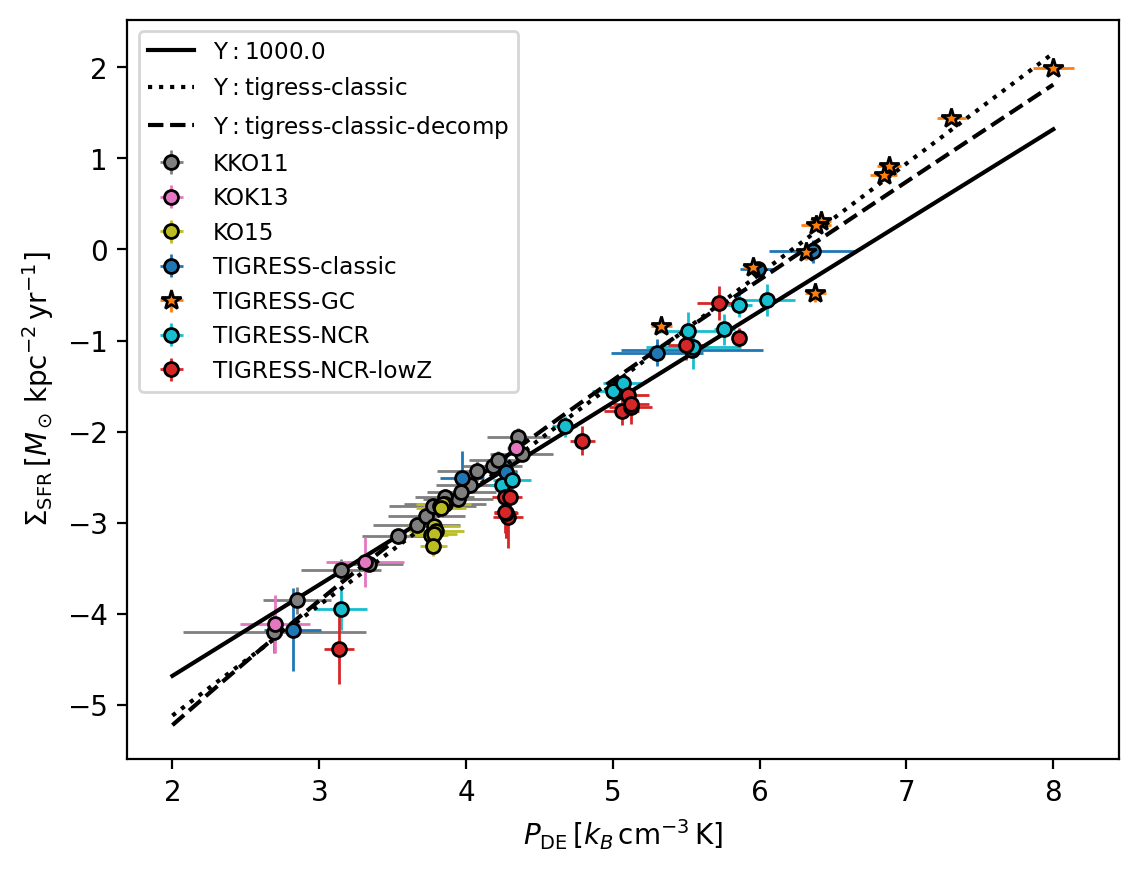

In [7]:
# all simulations
for i,(k,data) in enumerate(sims.data.items()):
    p = sims.add_one_sim(data)

# P_SFR
sims.add_PSFR_model_lines(Wmin=2,Wmax=8)
plt.legend(fontsize='small')


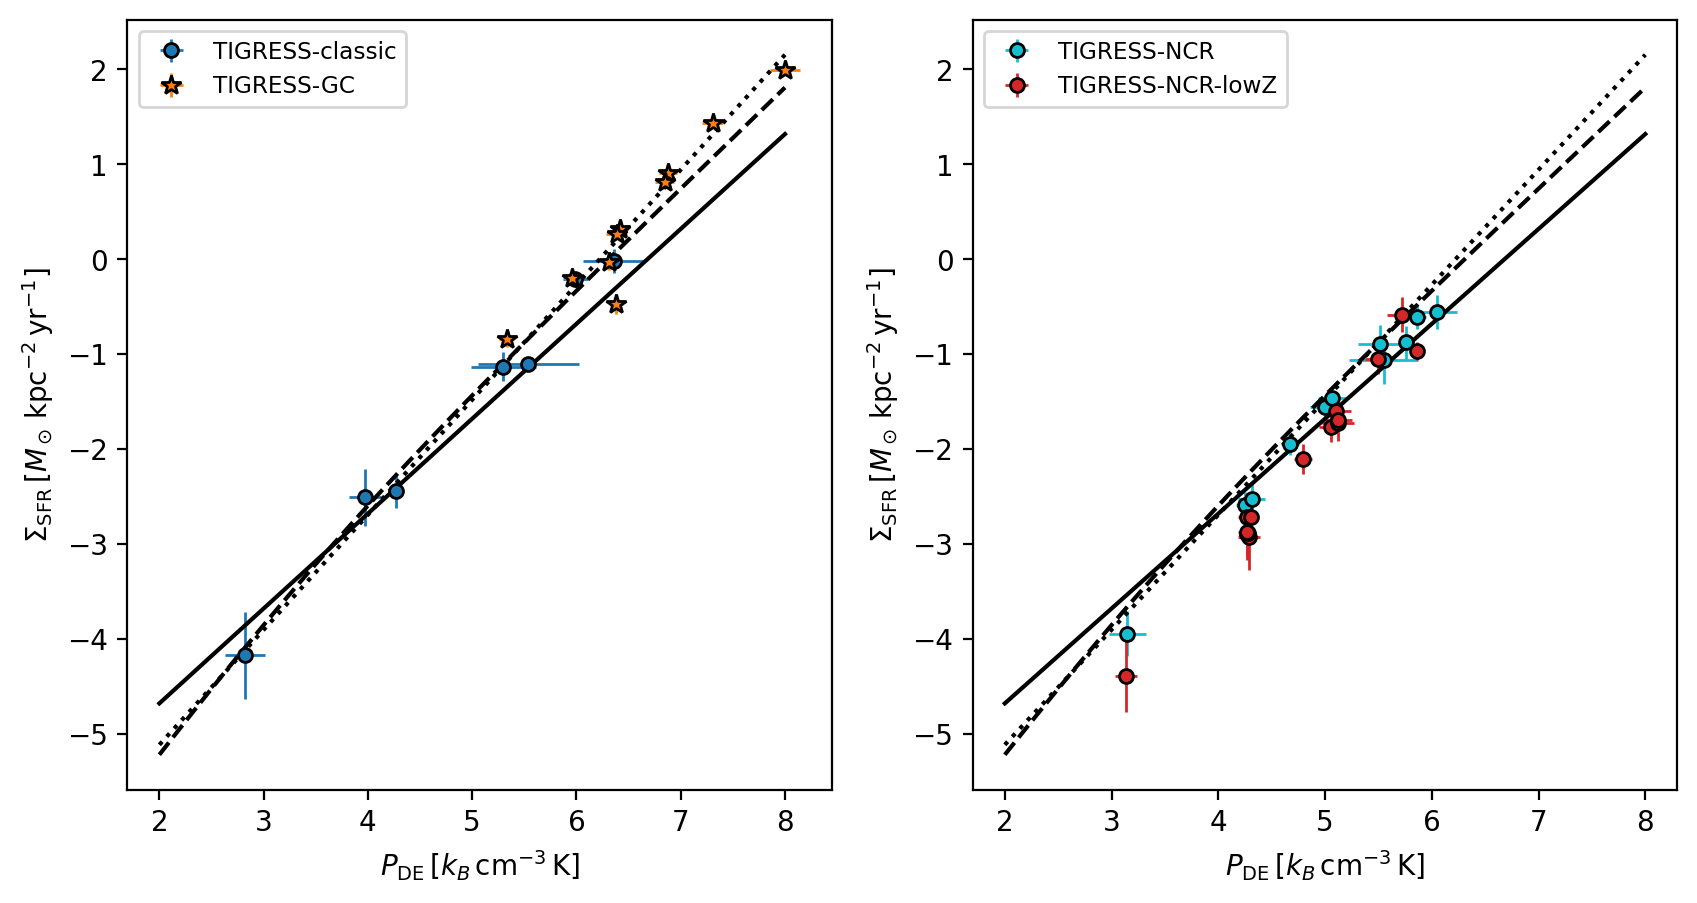

In [8]:
fig,axes = plt.subplots(1,2,figsize=(10,5))

for ax, mlist in zip(axes,[['TIGRESS-classic','TIGRESS-GC'],
                           ['TIGRESS-NCR','TIGRESS-NCR-lowZ']]):
    plt.sca(ax)
    for i,k in enumerate(mlist):
        data = sims.data[k]
        p = sims.add_one_sim(data)
    plt.legend(fontsize='small')
    sims.add_PSFR_model_lines(Wmin=2,Wmax=8)
